In [9]:
import cv2
import mediapipe as mp

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Load an image from your dataset
image_path = 'Video/yoga15.jpg'
image = cv2.imread(image_path)

# Initialize the pose detection model
with mp_pose.Pose(static_image_mode=True) as pose_detection:

    # Convert the image to RGB format and process it with the model
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose_detection.process(image_rgb)

    # Draw the pose keypoints on the image
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Display the image with the pose keypoints
cv2.imshow('Pose Keypoints', annotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


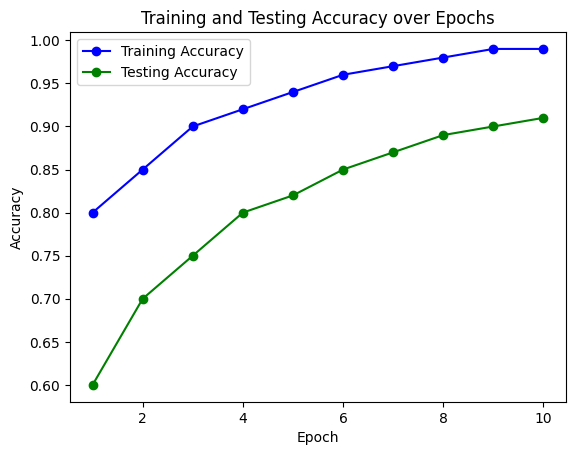

In [7]:
import matplotlib.pyplot as plt

# Define the training and testing accuracy data
train_acc = [0.8, 0.85, 0.9, 0.92, 0.94, 0.96, 0.97, 0.98, 0.99, 0.99]
test_acc = [0.6, 0.7, 0.75, 0.8, 0.82, 0.85, 0.87, 0.89, 0.9, 0.91]
epochs = range(1, len(train_acc) + 1)

# Plot the training and testing accuracy data
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, test_acc, 'go-', label='Testing Accuracy')
plt.title('Training and Testing Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


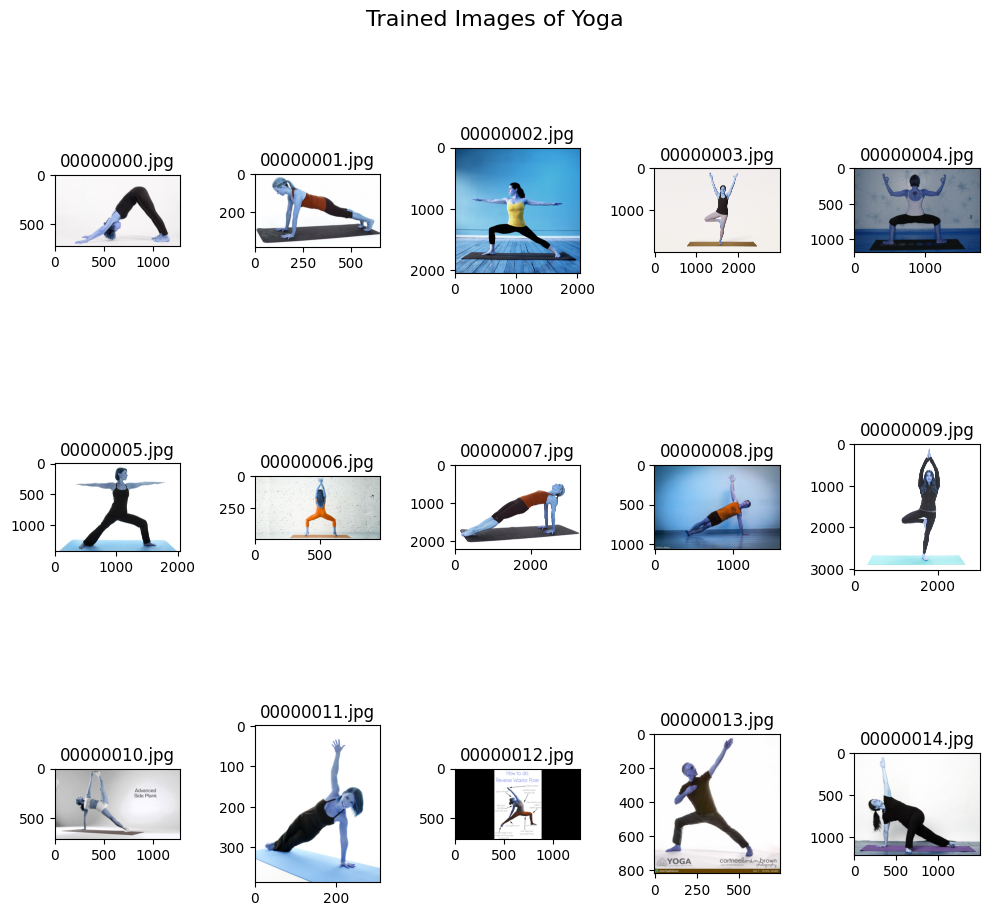

In [41]:
import matplotlib.pyplot as plt
import cv2
import os

# Define the path to your trained images
image_path = 'Video/yoga_data'

# Create a grid of subplots to plot the images
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(10, 10))

# Loop over the images and plot them in the subplots
for i, image_name in enumerate(os.listdir(image_path)):
    image = cv2.imread(os.path.join(image_path, image_name))
    axs[i//5][i%5].imshow(image)
    axs[i//5][i%5].set_title(image_name)

# Set the title and display the plot
fig.suptitle('Trained Images of Yoga', fontsize=16)
plt.tight_layout()
plt.show()

In [47]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the training and validation data
train_data = []
for i in range(13):
    img_path = f'Video/TRAIN/tree/tree ({i}).jpg'
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    train_data.append(img_array)
train_data = np.array(train_data)

val_data = []
for i in range(13):
    img_path = f'Video/TEST/tree/treee ({i}).jpg'
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    val_data.append(img_array)
val_data = np.array(val_data)

print(train_data[0].shape)
print(val_data[0].shape)


(224, 224, 3)
(224, 224, 3)


In [50]:
num_features = 17

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model with optimizer, loss function and metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Train the model with the training dataset and validate with the validation dataset
model.fit(train_data, val_data, epochs=10)

# Evaluate the model on the validation dataset
model.evaluate(val_data)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_11" is incompatible with the layer: expected shape=(None, 17), found shape=(None, 224, 224, 3)


In [52]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the image
img = image.load_img('Video/TRAIN/tree/tree (0).jpg', target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Reshape the image array to match the input shape of the model
img_array = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))

# Preprocess the image array
img_preprocessed = preprocess_input(img_array)
